In [7]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [8]:

df = pd.read_csv('preprocessed_data.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df.set_index('Date', inplace=True)
df.index = df.index.tz_convert('Europe/Amsterdam')

X = df[[
        'DAY AHEAD FORECAST (ENAPPSYS)',
        'SOLAR FORECAST UNADJUSTED (ENAPPSYS)',
        'WIND FORECAST UNADJUSTED (ENAPPSYS)',
        'FORECAST D-1 (ENAPPSYS)',
        'DA Scheduled Flow',
        'Scheduled Flow', 
        'MinuteOfDay', 
        'HourOfDay',
        #'Dispatch -5m',
        #'Imbalance_Price -5m',
        #'IGCC_Dispatch -5m',
        'Dispatch -2H',
        'Imbalance_Price -2H',
        'minmax',
        'min600',
        'min300',
        'min100',
        'minmin',
        'posmin',
        'pos100',
        'pos300',
        'pos600',
        'posmax']]
        
y = df[['Final_Price']]
timestamps = [X.index]
timestamps = np.array(timestamps).reshape((-1,1))

X = X.values
y = y.values


(263520, 20)
(263520, 1)
(43920, 20)
(263520, 20)
(263520, 1)
(43920, 20)
(263520, 20)
(263520, 1)
(43920, 20)
(263520, 20)
(263520, 1)
(43920, 20)
[101.86450870398252, 105.2388735796052, 68.10531238715129, 71.90929921819557]
[175.86327624090364, 167.9950795276847, 139.6805315886899, 124.65631615042257]


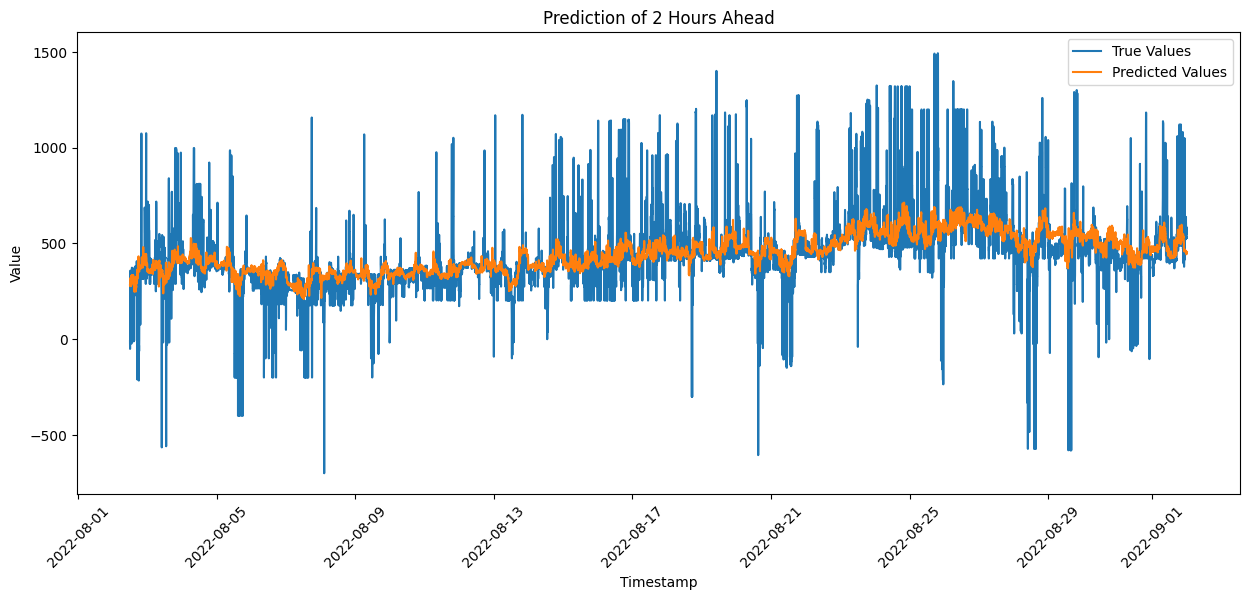

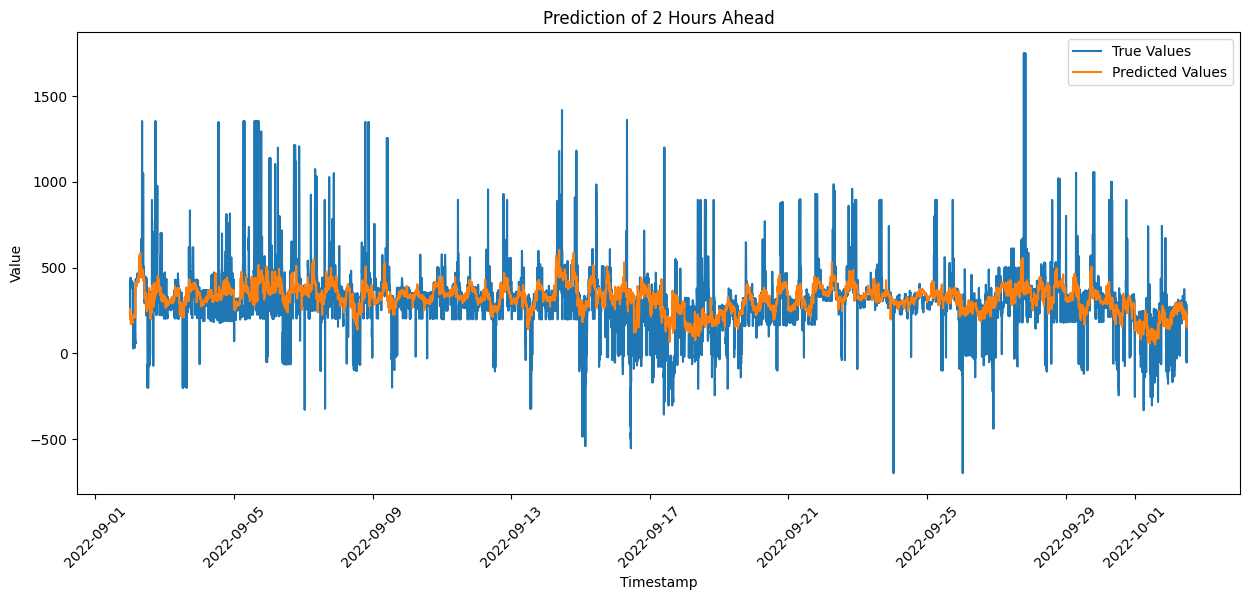

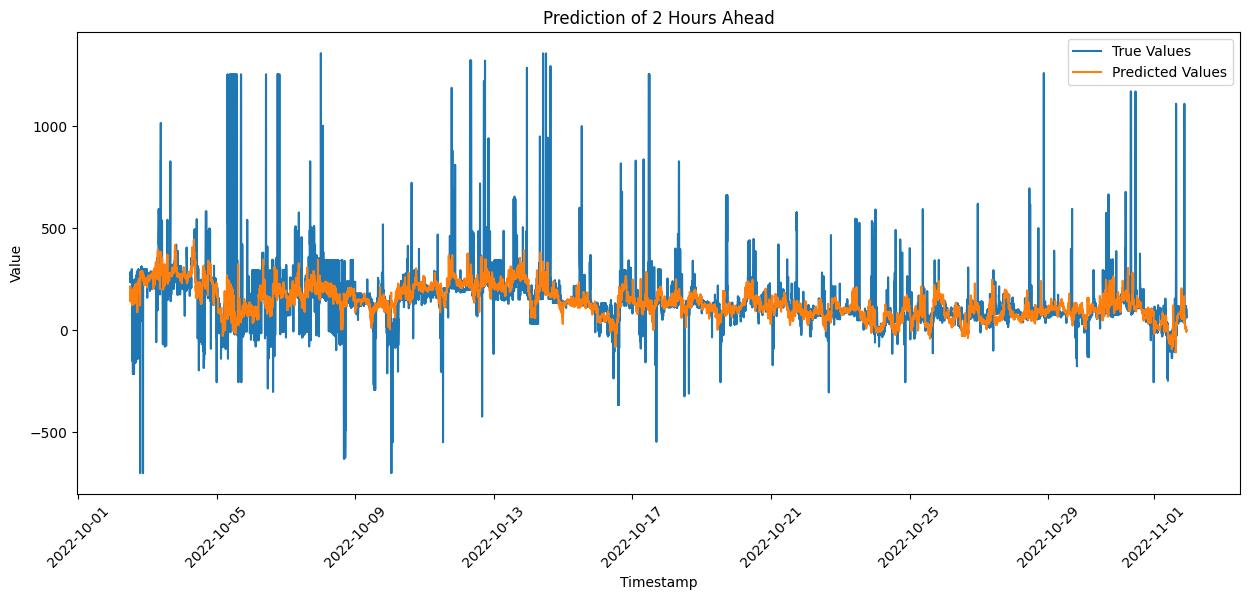

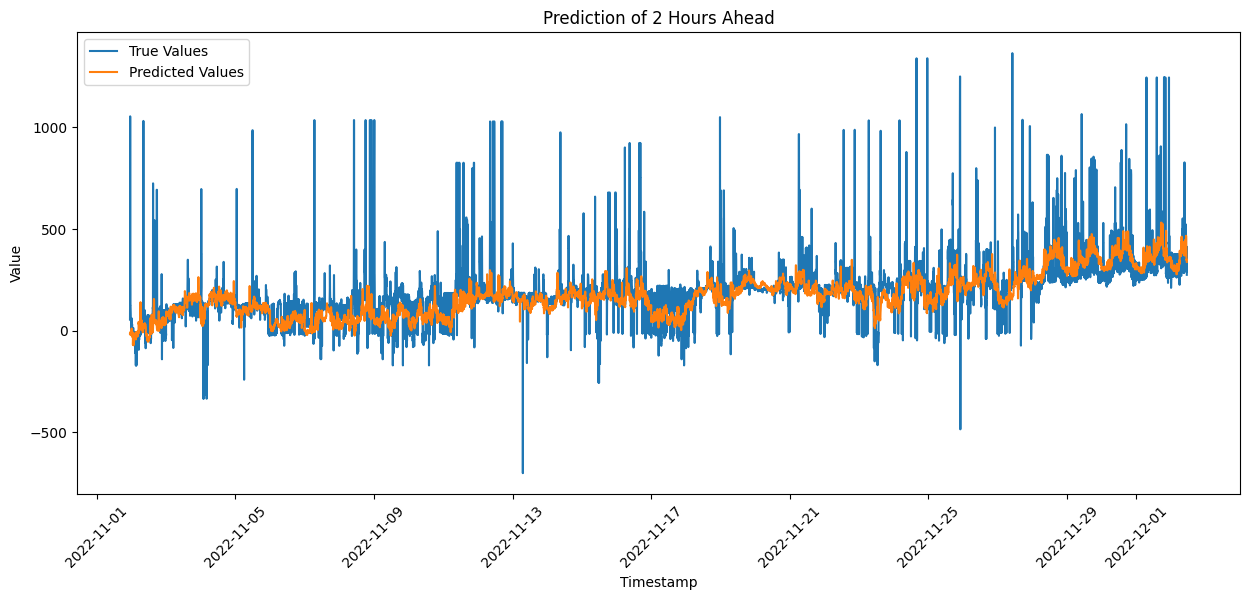

In [9]:
training_segment = int(7 * 30.5 * 24 * 60)
validation_test_segment = int(30.5 * 24 * 60 * 1)

mae_scores = []
rmse_scores = []
month_counter = 0
it_counter = 0

for i in range(0, len(X)- training_segment, validation_test_segment):
    train_start = i
    train_end = i + training_segment
    val_start = train_end
    val_end = val_start + validation_test_segment
    test_start = val_end
    test_end = test_start + validation_test_segment

    X_train = X[train_start:train_end]
    y_train = y[train_start:train_end]
    X_val = X[val_start:val_end]
    y_val = y[val_start:val_end]
    X_test = X[test_start:test_end]
    y_test = y[test_start:test_end]
    model = LinearRegression()

    model.fit(X_train, y_train)

    y_test_prediction = model.predict(X_test)

    start_idx = test_start
    end_idx = test_end
    plt.figure(figsize=(15, 6))
    plt.plot(timestamps[start_idx:end_idx], y_test[:, 0], label='True Values')
    plt.plot(timestamps[start_idx:end_idx], y_test_prediction[:, 0], label='Predicted Values')
    plt.title("Prediction of 2 Hours Ahead")
    plt.xlabel("Timestamp")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(f'Predicted Price 2H Ahead Month{month_counter} Linear.png')
    
    mae = mean_absolute_error(y_test, y_test_prediction)
    rmse = mean_squared_error(y_test, y_test_prediction, squared=False)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    month_counter += 1
    it_counter += 1
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    if it_counter > 3:
        break
print(mae_scores)
print(rmse_scores)

In [10]:
print(mae_scores)
print(rmse_scores)

[101.86450870398252, 105.2388735796052, 68.10531238715129, 71.90929921819557]
[175.86327624090364, 167.9950795276847, 139.6805315886899, 124.65631615042257]


In [11]:

df = pd.read_csv('preprocessed_data.csv', sep=';')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S%z', utc=True)
df.set_index('Date', inplace=True)
df.index = df.index.tz_convert('Europe/Amsterdam')

X = df[[
        'DAY AHEAD FORECAST (ENAPPSYS)',
        'SOLAR FORECAST UNADJUSTED (ENAPPSYS)',
        'WIND FORECAST UNADJUSTED (ENAPPSYS)',
        'FORECAST D-1 (ENAPPSYS)',
        'DA Scheduled Flow',
        'Scheduled Flow', 
        'MinuteOfDay', 
        'HourOfDay',
        'Imbalance_Price -5m',
        'minmax',
        'min600',
        'min300',
        'min100',
        'minmin',
        'posmin',
        'pos100',
        'pos300',
        'pos600',
        'posmax']]
        
y = df[['Final_Price']]
timestamps = [X.index]
timestamps = np.array(timestamps).reshape((-1,1))

X = X.values
y = y.values


(263520, 19)
(263520, 1)
(43920, 19)
(263520, 19)
(263520, 1)
(43920, 19)
(263520, 19)
(263520, 1)
(43920, 19)
(263520, 19)
(263520, 1)
(43920, 19)
[62.353652553450374, 62.940350448128456, 41.64918745342351, 43.53973059725545]
[116.6003838323239, 107.79876914241979, 97.31580186358138, 88.36394072245069]


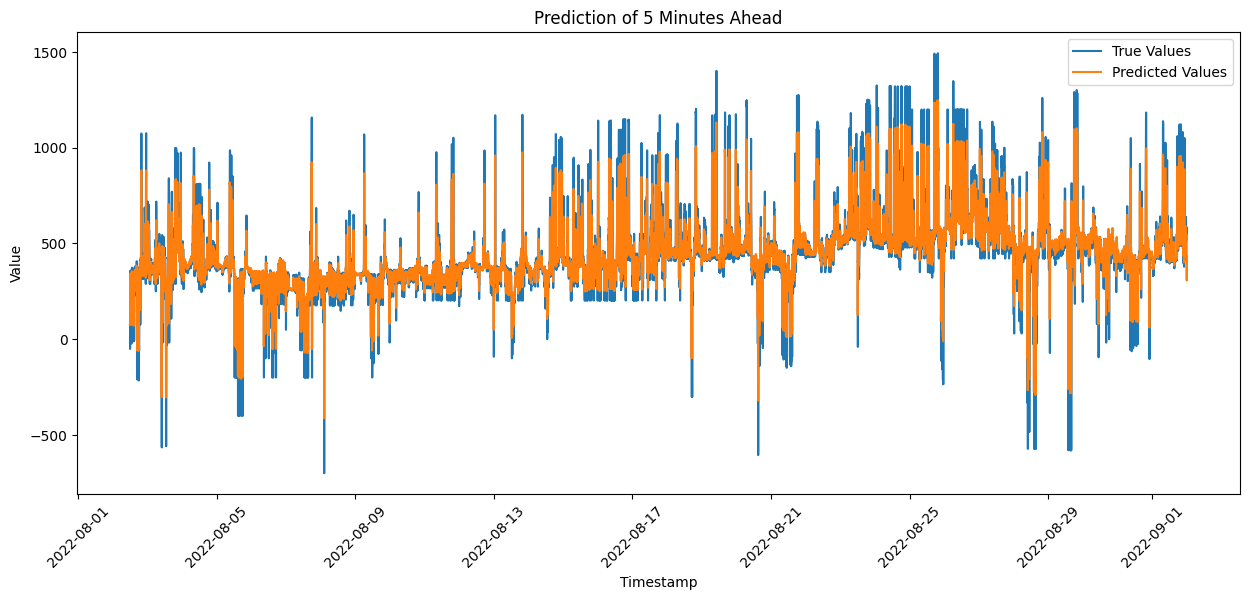

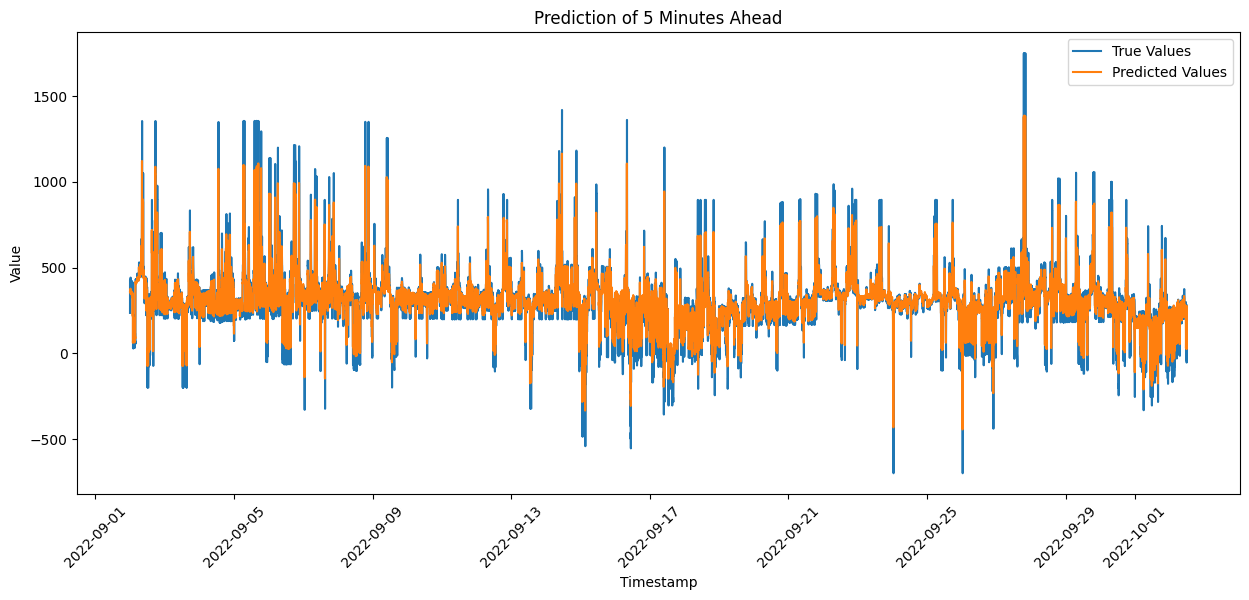

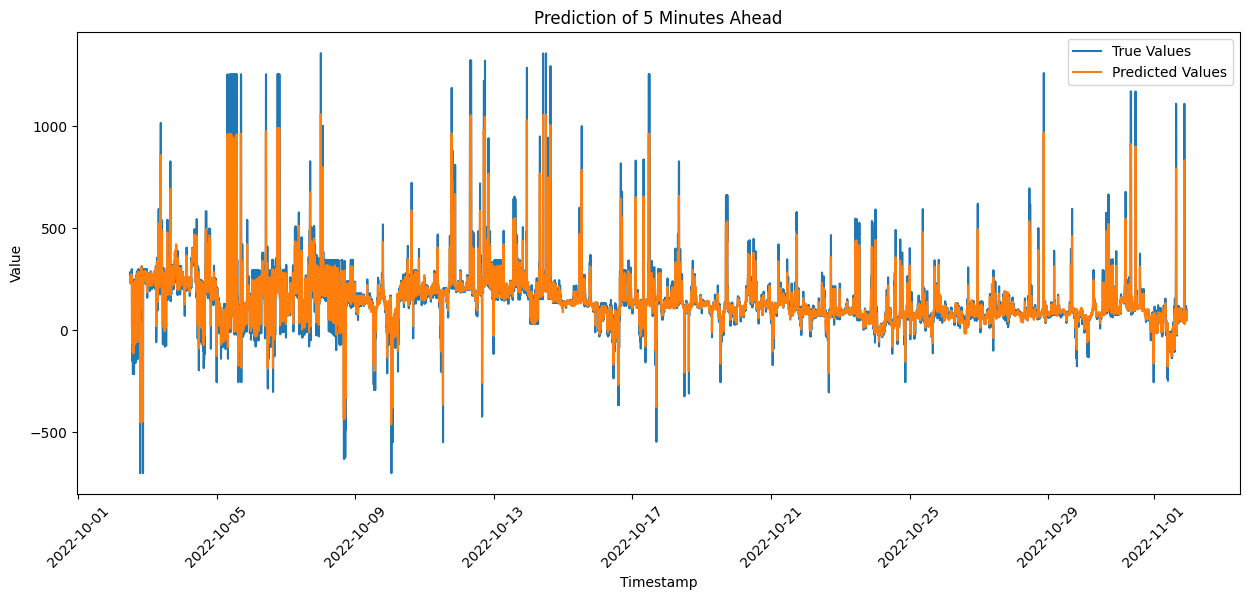

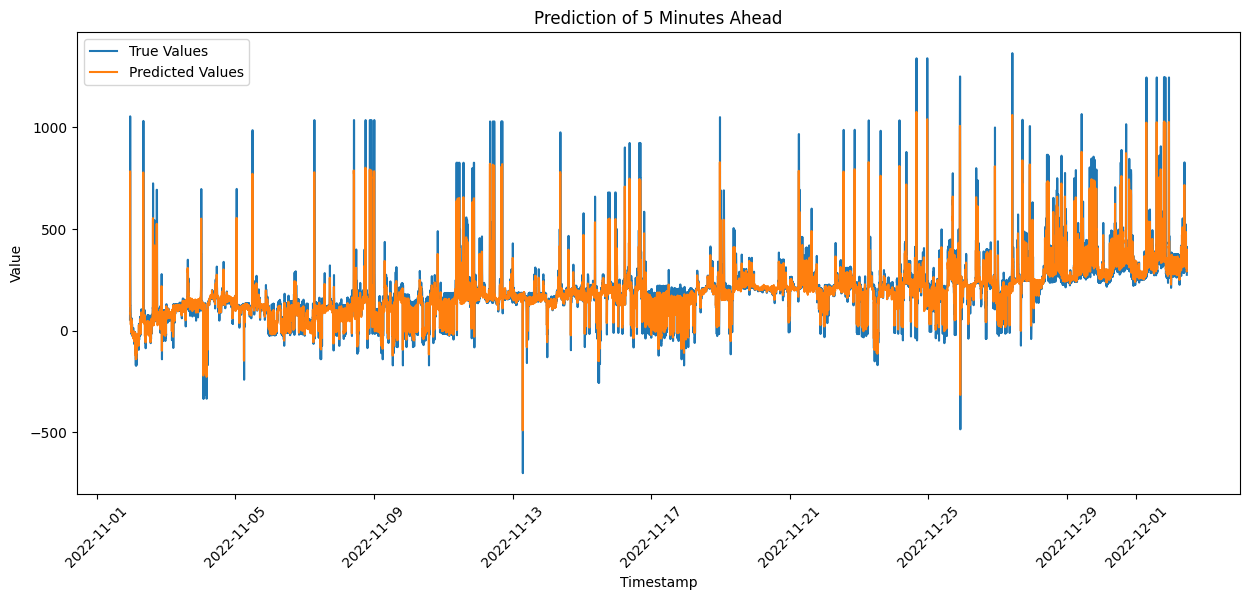

In [12]:
training_segment = int(6 * 30.5 * 24 * 60)  # 8 months
validation_test_segment = int(30.5 * 24 * 60 * 1)  # 1 month

mae_scores = []
rmse_scores = []
month_counter = 0
it_counter = 0

for i in range(0, len(X)- training_segment, validation_test_segment):
    train_start = i
    train_end = i + training_segment
    val_start = train_end
    val_end = val_start + validation_test_segment
    test_start = val_end
    test_end = test_start + validation_test_segment

    X_train = X[train_start:train_end]
    y_train = y[train_start:train_end]
    X_val = X[val_start:val_end]
    y_val = y[val_start:val_end]
    X_test = X[test_start:test_end]
    y_test = y[test_start:test_end]

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_test_prediction = model.predict(X_test)

    start_idx = test_start
    end_idx = test_end
    plt.figure(figsize=(15, 6))
    plt.plot(timestamps[start_idx:end_idx], y_test[:, 0], label='True Values')
    plt.plot(timestamps[start_idx:end_idx], y_test_prediction[:, 0], label='Predicted Values')
    plt.title("Prediction of 5 Minutes Ahead")
    plt.xlabel("Timestamp")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.legend()
    plt.savefig(f'Predicted Price 5min Ahead Month{month_counter} Linear.png')
    
    mae = mean_absolute_error(y_test, y_test_prediction)
    rmse = mean_squared_error(y_test, y_test_prediction, squared=False)
    mae_scores.append(mae)
    rmse_scores.append(rmse)
    month_counter += 1
    it_counter += 1
    print(X_train.shape)
    print(y_train.shape)
    print(X_test.shape)
    if it_counter > 3:
        break
print(mae_scores)
print(rmse_scores)

In [13]:
print(mae_scores)
print(rmse_scores)

[62.353652553450374, 62.940350448128456, 41.64918745342351, 43.53973059725545]
[116.6003838323239, 107.79876914241979, 97.31580186358138, 88.36394072245069]
